### Linear Regression

In [20]:
# Reproduce results
set.seed(1234567)

### Data-Set

In [21]:
# Random data in which y is a noisy function of x
X <- runif(100, -5, 5)
y <- X + rnorm(100) + 3

### 1. Linear Regression in R


Call:
lm(formula = y ~ X)

Coefficients:
(Intercept)            X  
     2.9455       0.9519  



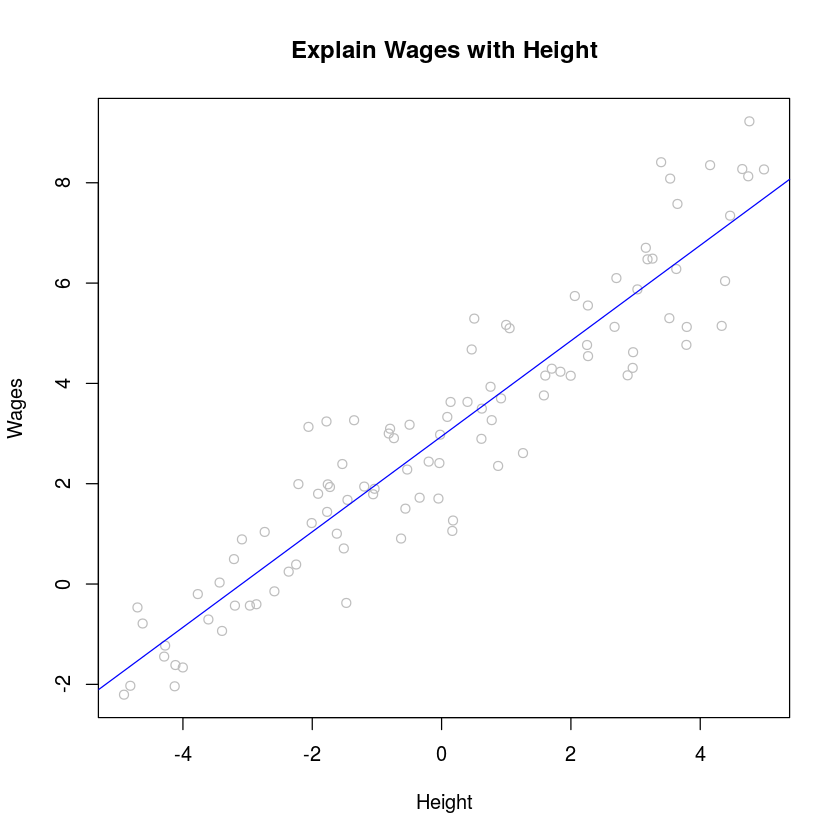

In [22]:
# Fit a model (regress weight on height)
fit <- lm(y ~ X)
print(fit)
# Coefficients:
#(Intercept)            X  
#     2.9455       0.9519 

# beta-hat
fit_params <- fit$coefficients

# Plot
plot(x=X, y=y, cex = 1, col = "grey",
     main = "Explain Wages with Height", xlab = "Height", ylab = "Wages")

# Draw the regression line (intercept, slope)
abline(a=fit_params[[1]], b=fit_params[[2]], col="blue") 

### 2. Linear Regression from Scratch

Eq: $$Y = X\beta + \varepsilon$$

Closed-form sol: $$\hat{\beta} = (X'X)^{-1}X'Y$$

           [,1]
intcpt 2.945535
       0.951942


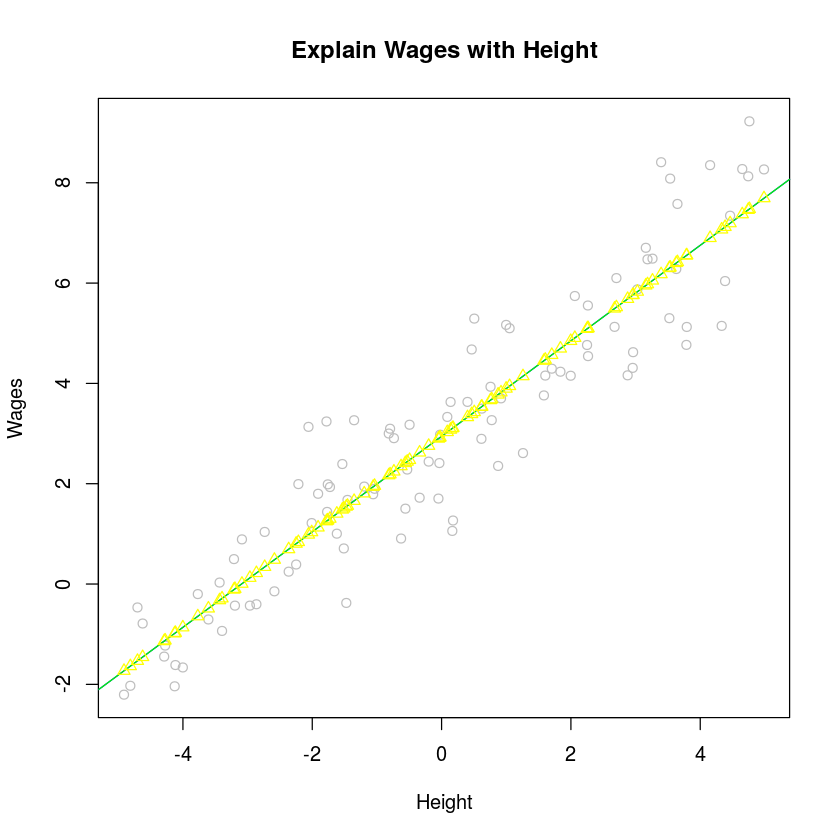

In [23]:
# Matrix of predictors (we only have one in this example)
X_mat <- as.matrix(X)
# Add column of 1s for intercept coefficient
intcpt <- rep(1, length(y))

# Combine predictors with intercept
X_mat <- cbind(intcpt, X_mat)

# OLS (closed-form solution)
beta_hat <- solve(t(X_mat) %*% X_mat) %*% t(X_mat) %*% y
print(beta_hat)
# 2.945535, 0.951942

# Plot
plot(x=X, y=y, cex = 1, col = "grey",
     main = "Explain Wages with Height", xlab = "Height", ylab = "Wages")

# Draw the previous regression line
abline(a=fit_params[[1]], b=fit_params[[2]], col="blue")
# Current regression line
abline(a=beta_hat[[1]], b=beta_hat[[2]], col="green")

# To get y-hat:
y_hat <- X_mat %*% beta_hat
points(x=X, y=y_hat, pch = 2, col='yellow')

### 3. Linear Regression with Gradient Descent

In [24]:
gradient_descent <- function(X, y, lr, epochs)
{
  X_mat <- cbind(1, X)
  # Initialise beta_hat matrix
  beta_hat <- matrix(1, nrow=ncol(X_mat))
  for (j in 1:epochs)
  {
    residual <- (X_mat %*% beta_hat) - y
    delta <- (t(X_mat) %*% residual) * (1/nrow(X_mat))
    beta_hat <- beta_hat - (lr*delta)
    # Draw the regression line each epoch
    abline(a=beta_hat[[1]], b=beta_hat[[2]], col="grey")
  }
  # Return 
  beta_hat
}

      [,1]
  2.945535
X 0.951942


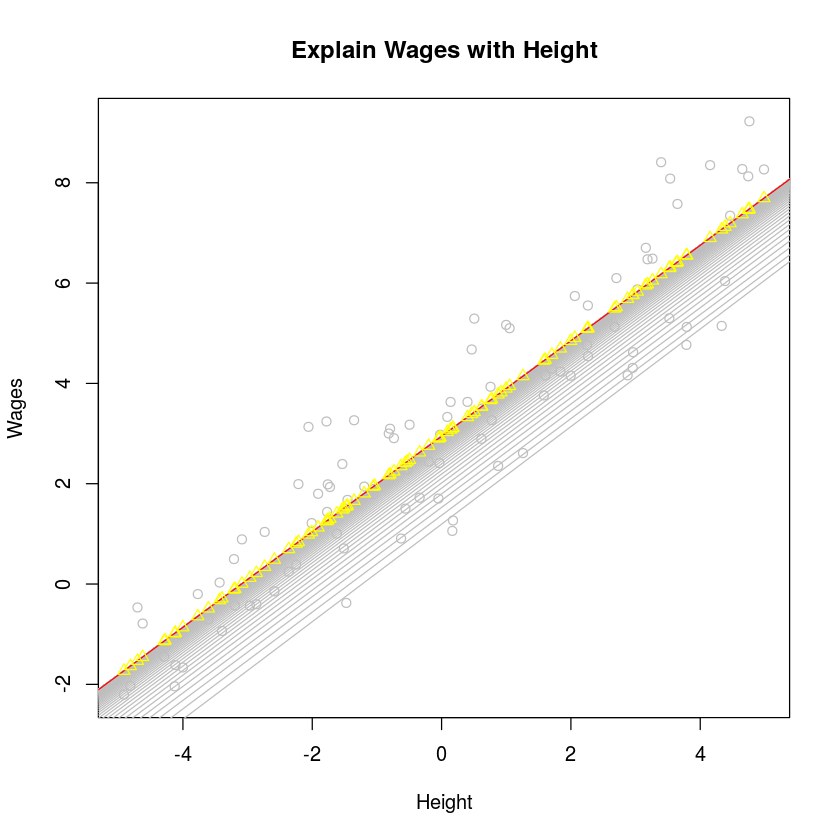

In [25]:
# Plot
plot(x=X, y=y, cex = 1, col = "grey",
     main = "Explain Wages with Height", xlab = "Height", ylab = "Wages")

beta_hat <- gradient_descent(X, y, 0.1, 200)
print(beta_hat)
# 2.945535, 0.951942

# Draw the regression line
abline(a=beta_hat[[1]], b=beta_hat[[2]], col="red")

# To get y-hat:
y_hat <- X_mat %*% beta_hat
points(x=X, y=y_hat, pch = 2, col='yellow')